<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Linear-Data-and-Homoscedasticity" data-toc-modified-id="Linear-Data-and-Homoscedasticity-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Linear Data and Homoscedasticity</a></span></li><li><span><a href="#Linear-Data-and-Heteroscedasticity" data-toc-modified-id="Linear-Data-and-Heteroscedasticity-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Linear Data and Heteroscedasticity</a></span></li><li><span><a href="#Non-Linear-Data-and-Homoscedasticity" data-toc-modified-id="Non-Linear-Data-and-Homoscedasticity-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Non-Linear Data and Homoscedasticity</a></span></li><li><span><a href="#Non-Linear-Data-and-Heteroscedasticity" data-toc-modified-id="Non-Linear-Data-and-Heteroscedasticity-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Non-Linear Data and Heteroscedasticity</a></span></li></ul></li><li><span><a href="#Boostrap-(TODO:-review)" data-toc-modified-id="Boostrap-(TODO:-review)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Boostrap (TODO: review)</a></span></li><li><span><a href="#My-Boot-(based-on-doubt)" data-toc-modified-id="My-Boot-(based-on-doubt)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>My Boot (based on doubt)</a></span><ul class="toc-item"><li><span><a href="#linear-data-equal-variance" data-toc-modified-id="linear-data-equal-variance-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>linear data equal variance</a></span></li><li><span><a href="#Non-linear-data-equal-variance" data-toc-modified-id="Non-linear-data-equal-variance-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Non linear data equal variance</a></span></li><li><span><a href="#Linear-Data-unequal-variance" data-toc-modified-id="Linear-Data-unequal-variance-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Linear Data unequal variance</a></span></li><li><span><a href="#Non-Linear-Data-unequal-variance" data-toc-modified-id="Non-Linear-Data-unequal-variance-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Non-Linear Data unequal variance</a></span></li><li><span><a href="#Ploting-(Show-me-dont-tell-me)" data-toc-modified-id="Ploting-(Show-me-dont-tell-me)-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Ploting (Show me dont tell me)</a></span></li></ul></li></ul></div>

while try to compare prediction intervals and compare different methodology with bootstrap I realized that bootstrap was not working. I realize that I do not understand very well how bootstrap works for PI.

Main doubts:
* Is there any bootstrap methods that address unequalvariance (heterokedasticity)?
    * I believe the implementantion of oubt might address with few changes. I believe when using qunatile is assuming
    * I believe it can address moderate heterokedasticity not strong like I am using
* How to implement this approach?
* Can I use bootstrap for estimation of median and std of the population?

**TODO**: Go back on this later so I have other priorities

refs:
* https://www.saattrupdan.com/posts/2021-04-04-doubt

**GOALS**
* Learn bootstrap for computing confidence intervals 
* Learn bootstarp for estimate mean, median and std of population
* test implementations
    * statmodels (it is the most mature libary)  <== TODO
    * doubt 
        * oprtunity to learn form other code (code review)
        * opportunity modify the code to make it work better
        * maybe do a pull request !? never know (<== personal library of a phd)

In [1]:
import IPython
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
# import keras
# from keras import backend as K

print(tf.__version__)

2023-04-12 19:30:51.879294: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 19:30:52.074081: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-12 19:30:52.074117: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-12 19:30:52.108230: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-12 19:30:53.386328: W tensorflow/stream_executor/platform/de

2.10.0


## Data

* Linear data for simplicity and comapre with linera reression
* Non linear qith hetredosticity data to compare all approaches

### Linear Data and Homoscedasticity

2 std: 0.50


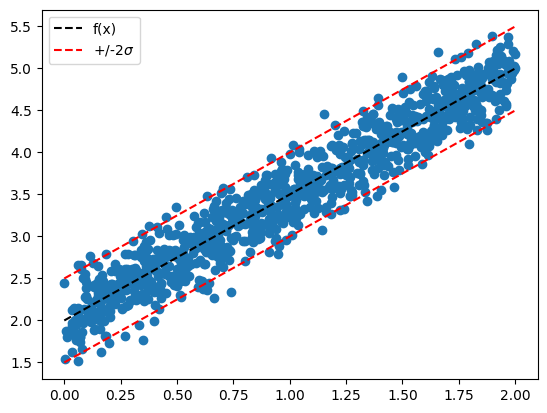

In [2]:
linear_params = {'a': 1.5, 'b': 2.0, 'sigma': 0.25}

def make_linear_data(n_samples, linear_params):

    X = np.random.uniform(low=0.,high=2.,size=(n_samples,1))

    _sigma = linear_params.get('sigma',None)
    
    noise = np.random.normal(loc=0.,scale=_sigma,size=(n_samples,1))

    a = linear_params.get('a',None)
    b = linear_params.get('b',None)
    f_x = a*X + b
    
    y =  f_x + noise

    #y = y.reshape([-1,1])/5.  # Is this important? Divide by 5 ? Why did he do it?
    y = y.reshape([-1,1])  # Is this important? Divide by 5 ? Why did he do it?

    X_train = X.reshape(-1)
    y_train = y.reshape(-1)

    X_train.shape
    y_train.shape

    yy_train = np.stack((y_train,y_train),axis=1) # make this 2d so will be accepted

    return X_train, y_train, yy_train
   
# create some data
n_samples = 1000
X_train, y_train, _ = make_linear_data(n_samples,linear_params)  
    
x_grid = np.linspace(0.0,2,100) # for evaluation plots
a = linear_params.get('a',None)
b = linear_params.get('b',None)
_sigma = linear_params.get('sigma',None)

f_x = a* x_grid + b
_delta = 2.0*_sigma  # 2 sigmas

print(f"2 std: {_delta:.2f}")

plt.scatter(X_train,y_train)
plt.plot(x_grid, f_x, 'k--',label='f(x)'); # regression line

plt.plot(x_grid, f_x + _delta, 'r--', label='+/-2$\sigma$'); # upper boundary prediction
plt.plot(x_grid, f_x - _delta, 'r--'); # lower boundary prediction

plt.legend();

### Linear Data and Heteroscedasticity

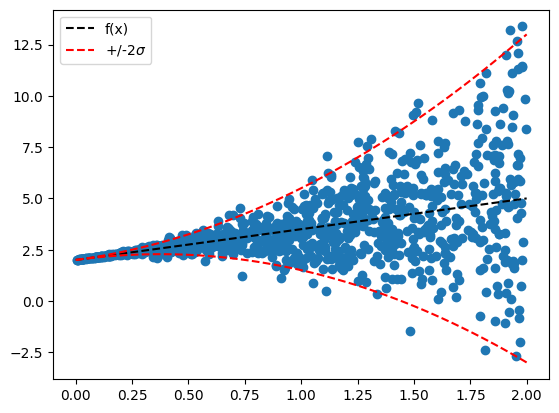

In [3]:
linear_params = {'a': 1.5, 'b': 2.0}

def make_linear_data_heteroscedasticity(n_samples, linear_params):

    X = np.random.uniform(low=0.,high=2.,size=(n_samples,1))

    # Generate the noise with Heteroscedasticity
    #noise = np.random.normal(loc=0, scale=X/5, size=n_samples)
    noise = np.random.normal(loc=0.,scale=1.*np.power(X,2))

    a = linear_params.get('a',None)
    b = linear_params.get('b',None)
    f_x = a*X + b
    
    y =  f_x + noise

    #y = y.reshape([-1,1])/5.  # Is this important? Divide by 5 ? Why did he do it?
    y = y.reshape([-1,1])  # Is this important? Divide by 5 ? Why did he do it?

    X_train = X.reshape(-1)
    y_train = y.reshape(-1)

    X_train.shape
    y_train.shape

    yy_train = np.stack((y_train,y_train),axis=1) # make this 2d so will be accepted

    return X_train, y_train, yy_train
   
# create some data
n_samples = 1000
X_train, y_train, _ = make_linear_data_heteroscedasticity(n_samples,linear_params)  
    
plt.scatter(X_train,y_train)

x_grid = np.linspace(0.0,2,100) # for evaluation plots
a = linear_params.get('a',None)
b = linear_params.get('b',None)

# Generate the noise with Heteroscedasticity
_sigma_x = 1.*np.power(x_grid,2)

f_x = a* x_grid + b
_delta = 2.0*_sigma_x  # 2 sigmas

#print(f"2 std: {_delta:.2f}")

plt.plot(x_grid, f_x, 'k--',label='f(x)'); # regression line

plt.plot(x_grid, f_x + _delta, 'r--', label='+/-2$\sigma$'); # upper boundary prediction
plt.plot(x_grid, f_x - _delta, 'r--'); # lower boundary prediction

plt.legend();

### Non-Linear Data and Homoscedasticity

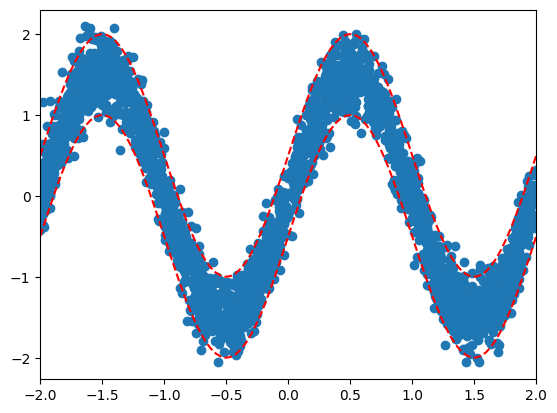

In [4]:
def make_non_linear_data_homoscedasticity(n_samples, _sigma = 0.25):

    X = np.random.uniform(low=-2.,high=2.,size=(n_samples,1))
    noise = np.random.normal(loc=0.,scale=_sigma,size=(n_samples,1))
    y = 1.5*np.sin(np.pi*X) + noise

    # normalization
    y = y.reshape([-1,1])

    X_train = X.reshape(-1)
    y_train = y.reshape(-1)

    yy_train = np.stack((y_train,y_train),axis=1) # make this 2d so will be accepted

    return X_train, y_train, yy_train
    
# create some data
n_samples = 2500

X_train, y_train, yy_train = make_non_linear_data_homoscedasticity(n_samples)

x_grid = np.linspace(-2,2,100) # for evaluation plots

f_x = 1.5*np.sin(np.pi*x_grid)
_sigma_x = 0.25

y_train.shape
yy_train.shape
 
# TODO: Add f(x) +/- 2 sigma  (NOT SIMPLE. NEEDS TO THINK A LITTLE)
#   f(x) = 1.5*np.sin(np.pi*X[:,0])
#   sigma => see scale in the code np.random.normal(loc=0.,scale=1.*np.power(X[:,0],2))
plt.scatter(X_train,y_train);

plt.plot(x_grid, f_x + 2.0*_sigma_x, 'r--', label='+/-2$\sigma$'); # upper boundary prediction
plt.plot(x_grid, f_x - 2.0*_sigma_x, 'r--'); # lower boundary prediction

plt.xlim(-2,2);
plt.show();

### Non-Linear Data and Heteroscedasticity

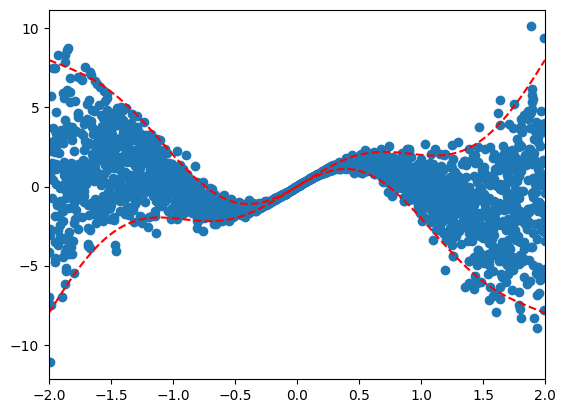

In [5]:
def make_non_linear_data(n_samples):

    X = np.random.uniform(low=-2.,high=2.,size=(n_samples,1))
    uncertanty = np.random.normal(loc=0.,scale=1.*np.power(X[:,0],2))
    y = 1.5*np.sin(np.pi*X[:,0]) + uncertanty

    # normalization
    y = y.reshape([-1,1])/5.

    X_train = X.reshape(-1)
    y_train = y.reshape(-1)

    yy_train = np.stack((y_train,y_train),axis=1) # make this 2d so will be accepted

    return X_train, y_train, yy_train
    
# create some data
n_samples = 2500

X_train, y_train, yy_train = make_non_linear_data(n_samples)

x_grid = np.linspace(-2,2,100) # for evaluation plots

f_x = 1.5*np.sin(np.pi*x_grid)
_sigma_x = np.power(x_grid,2)

y_train.shape
yy_train.shape
 
# TODO: Add f(x) +/- 2 sigma  (NOT SIMPLE. NEEDS TO THINK A LITTLE)
#   f(x) = 1.5*np.sin(np.pi*X[:,0])
#   sigma => see scale in the code np.random.normal(loc=0.,scale=1.*np.power(X[:,0],2))
plt.scatter(X_train,y_train*5.0);

plt.plot(x_grid, f_x + 2.0*_sigma_x, 'r--', label='+/-2$\sigma$'); # upper boundary prediction
plt.plot(x_grid, f_x - 2.0*_sigma_x, 'r--'); # lower boundary prediction

plt.xlim(-2,2);
plt.show();

## Boostrap (TODO: review)

In [ ]:
#pip install doubt # https://github.com/saattrupdan/doubt
#pip install scikits.bootstrap # https://github.com/cgevans/scikits-bootstrap

**TODO**: I need to understan better bootstrap
1. run linear data equal variance vs uniquequal variance
1. run non linear data equal variance vs uniquequal variance
1. try normal bootstrap vs weighted bootstrap
1. Move all your leanings to bootstrap notebook in the repo about statistics
1. keep the one works for non-linear and unuqual variance

refs:
* https://www.saattrupdan.com/posts/2021-04-04-doubt
* https://www.saattrupdan.com/2020-03-01-bootstrap-prediction

Bootstrapping is a resampling technique that involves generating new datasets by sampling with replacement from the original dataset. It can be used to estimate prediction intervals by repeatedly fitting the model to bootstrap samples and computing the desired quantiles of the resulting distribution of predictions.

* Pros (statisics)
    * No assuption of data distribution. Linear regression assumes normal distributions and **Homoscedasticity** fr instance. So, can be more reliable. 

* Crons:
    * computationally expensive
    * the PI can be too narrow or too wide many times
    * the bootstrap resampling method may produce biased prediction intervals because it assumes that the errors are homoscedastic
        *  In such cases, it may be necessary to use a modified bootstrap method that takes into account the heteroscedasticity of the errors. (More complex. Not in this nb) 
refs:
* https://medium.com/@joetrankang/i-used-data-science-and-bootstrap-to-determine-the-optimal-housing-price-daddeefaa8eb
* Look gitlab code and org files for R code for boostrap 


In [6]:
from doubt.datasets import PowerPlant
from sklearn.linear_model import LinearRegression
from doubt import Boot

/home/leandroohf/.venvs/ml-leandro/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## My Boot (based on doubt)

In [23]:
"""Bootstrap wrapper for datasets and models"""

import copy
import multiprocessing as mp
from types import MethodType
from typing import Callable, Optional, Tuple, Union

import numpy as np
from joblib import Parallel, delayed


class MyBoot:
    """Bootstrap wrapper for datasets and models.
    Datasets can be any sequence of numeric input, from which bootstrapped statistics
    can be calculated, with confidence intervals included.
    The models can be any model that is either callable or equipped with a `predict`
    method, such as all the models in `scikit-learn`, `pytorch` and `tensorflow`, and
    the bootstrapped model can then produce predictions with prediction intervals.
    The bootstrapped prediction intervals are computed using the an extension of method
    from [2] which also takes validation error into account. To remedy this, the .632+
    bootstrap estimate from [1] has been used. Read more in [3].
    Args:
        input (float array or model):
            Either a dataset to calculate bootstrapped statistics on, or an model for
            which bootstrapped predictions will be computed.
        random_seed (float or None):
            The random seed used for bootstrapping. If set to None then no seed will be
            set. Defaults to None.
    Examples:
        Compute the bootstrap distribution of the mean, with a 95% confidence
        interval::
            >>> from doubt.datasets import FishToxicity, PowerPlant
            >>> import numpy as np
            >>> X, y = FishToxicity().split()
            >>> boot = Boot(y, random_seed=42)
            >>> preds, intervals = boot.compute_statistic(np.mean)
            >>> round(preds, 2)
            4.06
            >>> np.around(intervals, 2)
            array([3.98, 4.17])
        Alternatively, we can output the whole bootstrap distribution::
            >>> preds, intervals = boot.compute_statistic(
            ...     np.mean,
            ...     n_boots=3,
            ...     return_all=True
            ... )
            >>> round(preds, 2)
            4.06
            >>> np.around(intervals, 2)
            array([4.06, 4.06, 4.06])
        Wrap a scikit-learn model and get prediction intervals::
            >>> from sklearn.linear_model import LinearRegression
            >>> X, y = PowerPlant().split()
            >>> linreg = Boot(LinearRegression(), random_seed=42)
            >>> linreg = linreg.fit(X, y)
            >>> preds, intervals = linreg.predict([10, 30, 1000, 50], uncertainty=0.05)
            >>> round(preds, 2)
            482.0
            >>> np.around(intervals, 2)
            array([473.5 , 490.14])
    Sources:
        [1]: Friedman, J., Hastie, T., & Tibshirani, R. (2001). The elements of
             statistical learning (Vol. 1, No. 10). New York: Springer series in
             statistics.
        [2]: Kumar, S., & Srivistava, A. N. (2012). Bootstrap prediction intervals in
             non-parametric regression with applications to anomaly detection.
        [3]: https://saattrupdan.github.io/2020-03-01-bootstrap-prediction
    """

    def __init__(self, input: object, random_seed: Optional[float] = None):
        self.random_seed = random_seed

        # Input is a model
        if callable(input) or hasattr(input, "predict"):
            self._model = input
            #self.fit = MethodType(fit, self)
            #self.predict = MethodType(predict, self)
            #type(self).__repr__ = MethodType(_model_repr, self)  # type: ignore

        # Input is a dataset
#         elif hasattr(input, "__getitem__"):
#             self.data = np.asarray(input)
#             self.compute_statistic = MethodType(compute_statistic, self)
#             type(self).__repr__ = MethodType(_dataset_repr, self)  # type: ignore

#         else:
#             raise TypeError("Input not recognised.")

    def compute_statistic(
        self,
        statistic: Callable[[np.ndarray], float],
        n_boots: Optional[int] = None,
        uncertainty: float = 0.05,
        quantiles: Optional[np.ndarray] = None,
        return_all: bool = False,
    ) -> Union[float, Tuple[float, np.ndarray]]:
        """Compute bootstrapped statistic.
        Args:
            statistic (callable):
                The statistic to be computed on bootstrapped samples.
            n_boots (int or None, optional):
                The number of resamples to bootstrap. If None then it is set to the square
                root of the data set. Defaults to None
            uncertainty (float, optional):
                The uncertainty used to compute the confidence interval of the bootstrapped
                statistic. Not used if `return_all` is set to True or if `quantiles` is not
                None. Defaults to 0.05.
            quantiles (Numpy array or None, optional):
                List of quantiles to output, as an alternative to the `uncertainty`
                argument, and will not be used if that argument is set. If None then
                `uncertainty` is used. Defaults to None.
            return_all (bool, optional):
                Whether all bootstrapped statistics should be returned instead of the
                confidence interval. Defaults to False.
        Returns:
            a float or a pair of a float and an array of floats:
                The statistic, and if `uncertainty` is set then also the confidence
                interval, or if `quantiles` is set then also the specified quantiles, or if
                `return_all` is set then also all of the bootstrapped statistics.
        """
        # Initialise random number generator
        rng = np.random.default_rng(self.random_seed)

        # Compute the statistic
        stat = statistic(self.data)

        # Get the number of data points
        n = int(self.data.shape[0])

        # Set default value of the number of bootstrap samples if `n_boots` is not set
        if n_boots is None:
            n_boots = int(np.sqrt(n).astype(int))

        # Compute the bootstrapped statistics
        boot_idxs = rng.choice(n, size=(n_boots, n), replace=True)
        statistics = np.apply_along_axis(statistic, 1, self.data[boot_idxs])

        if return_all:
            return stat, statistics
        else:
            # If uncertainty is set then set `quantiles` to be the two ends of the
            # confidence interval
            if uncertainty is not None:
                quantiles = [uncertainty / 2, 1.0 - (uncertainty / 2)]
            else:
                quantiles = list(quantiles)

            # Compute the quantile values
            quantile_vals = np.quantile(statistics, q=quantiles)
            return stat, quantile_vals


    def predict(
        self,
        X: np.ndarray,
        n_boots: Optional[int] = None,
        uncertainty: Optional[float] = None,
        quantiles: Optional[np.ndarray] = None,
    ) -> Tuple[Union[float, np.ndarray], np.ndarray]:
        """Compute bootstrapped predictions.
        Args:
            X (float array):
                The array containing the data set, either of shape (f,) or (n, f), with n
                being the number of samples and f being the number of features.
            n_boots (int or None, optional):
                The number of resamples to bootstrap. If None then it is set to the square
                root of the data set. Defaults to None
            uncertainty (float or None, optional):
                The uncertainty used to compute the prediction interval of the bootstrapped
                prediction. If None then no prediction intervals are returned. Defaults to
                None.
            quantiles (sequence of floats or None, optional):
                List of quantiles to output, as an alternative to the `uncertainty`
                argument, and will not be used if that argument is set. If None then
                `uncertainty` is used. Defaults to None.
        Returns:
            float array or pair of float arrays:
                The bootstrapped predictions, and the confidence intervals if `uncertainty`
                is not None, or the specified quantiles if `quantiles` is not None.
        """
        # Initialise random number generator
        rng = np.random.default_rng(self.random_seed)

        # Ensure that input feature matrix is a Numpy array
        X = np.asarray(X)

        # If `X` is one-dimensional then expand it to two dimensions and save the
        # information, so that we can ensure the output is also one-dimensional
        onedim = len(X.shape) == 1
        if onedim:
            X = np.expand_dims(X, 0)

        # Get the full non-bootstrapped predictions of `X`
        preds = self._model(X) if callable(self._model) else self._model.predict(X)

        # If no quantiles should be outputted then simply return the predictions of the
        # underlying model
        if uncertainty is None and quantiles is None:
            return preds

        # Ensure that the underlying model has been fitted before predicting. This is only
        # a requirement if `uncertainty` is set, as we need access to `self.X_train`
        if not hasattr(self, "X_train") or self.X_train is None:
            raise RuntimeError(
                "This model has not been fitted yet! Call fit() "
                "before predicting new samples."
            )

        # Store the number of data points in the training and test datasets
        n_train = self.X_train.shape[0]

        # The authors chose the number of bootstrap samples as the square root of the
        # number of samples in the training dataset
        if n_boots is None:
            n_boots = int(np.sqrt(n_train).astype(int))

        # Sample the bootstrap indices
        train_idxs = rng.choice(n_train, size=(n_boots, n_train), replace=True)

        # Run the worker function in parallel
        with Parallel(n_jobs=mp.cpu_count() - 1) as parallel:
            bootstrap_preds_list = parallel(
                delayed(_model_fit_predict)(
                    model=self._model,
                    X_train=self.X_train[train_idxs[boot_idx], :],
                    y_train=self.y_train[train_idxs[boot_idx]],
                    X_test=X,
                )
                for boot_idx in range(n_boots)
            )

        # Convert the list of predictions to a Numpy array
        bootstrap_preds = np.array(bootstrap_preds_list)

        # Centre the bootstrapped predictions across the bootstrap dimension
        bootstrap_preds -= np.mean(bootstrap_preds, axis=0)

        # Add up the bootstrap predictions and the hybrid train/val residuals
        C = np.array([m + o for m in bootstrap_preds for o in self.residuals])

        # Calculate the desired quantiles
        if quantiles is None and uncertainty is not None:
            quantiles = [uncertainty / 2, 1 - uncertainty / 2]
        quantile_vals = np.transpose(np.quantile(C, q=quantiles or [], axis=0))
        
        self.quantile_vals = quantile_vals
        
        # Return the predictions and the desired quantiles
        if onedim:
            return preds[0], (preds + quantile_vals)[0]
        else:
            return preds, np.expand_dims(preds, axis=1) + quantile_vals


    def fit(self, X: np.ndarray, y: np.ndarray, n_boots: Optional[int] = None):
        """Fits the model to the data.
        Args:
            X (float array):
                The array containing the data set, either of shape (f,) or (n, f), with n
                being the number of samples and f being the number of features.
            y (float array):
                The array containing the target values, of shape (n,)
            n_boots (int or None):
                The number of resamples to bootstrap. If None then it is set to the square
                root of the data set. Defaults to None
        """
        # Initialise random number generator
        rng = np.random.default_rng(self.random_seed)

        # Set the number of data points in the dataset
        n = X.shape[0]

        # Set default value of `n_boots` if it is not set
        if n_boots is None:
            n_boots = int(np.sqrt(n).astype(int))

        # Ensure that `X` and `y` are Numpy arrays
        X = np.asarray(X)
        y = np.asarray(y)

        # Store `X` and `y` for predictions
        self.X_train = X
        self.y_train = y

        # Fit the underlying model and get predictions on the training dataset
        self._model.fit(X, y)
        preds = self._model(X) if callable(self._model) else self._model.predict(X)

        # Calculate the training residuals and aggregate them into quantiles, to enable
        # comparison with the validation residuals
        train_residuals = np.quantile(y - preds, q=np.arange(0, 1, 0.01))

        # Sample the bootstrap indices
        train_idxs = rng.choice(n, size=(n_boots, n), replace=True)

        # Run the worker function in parallel
        with Parallel(n_jobs=mp.cpu_count() - 1) as parallel:
            bootstrap_preds = parallel(
                delayed(_model_fit_predict)(
                    model=self._model,
                    X_train=self.X_train[train_idxs[boot_idx], :],
                    y_train=self.y_train[train_idxs[boot_idx]],
                    X_test=X[[idx for idx in range(n) if idx not in train_idxs[boot_idx]]],
                )
                for boot_idx in range(n_boots)
            )

        # Compute the validation residuals
        val_residuals_list = [
            y[[idx for idx in range(n) if idx not in train_idxs[boot_idx]]]
            - bootstrap_preds[boot_idx]
            for boot_idx in range(n_boots)
        ]

        # Aggregate the validation residuals into quantiles, to enable comparison with the
        # training residuals
        val_residuals = np.concatenate(val_residuals_list)
        val_residuals = np.quantile(val_residuals, q=np.arange(0, 1, 0.01))

        # Compute the no-information value
        permuted = rng.permutation(y) - rng.permutation(preds)
        no_info_error = np.mean(np.abs(permuted))
        no_info_val = np.abs(no_info_error - train_residuals)

        # Compute the .632+ bootstrap estimate for the sample noise and bias
        generalisation = np.abs(val_residuals.mean() - train_residuals.mean())
        relative_overfitting_rate = np.mean(generalisation / no_info_val)
        weight = 0.632 / (1 - 0.368 * relative_overfitting_rate)
        
        self.residuals = (1 - weight) * train_residuals + weight * val_residuals

        return self
    
    
def _model_fit_predict(
    model, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray
) -> np.ndarray:
    """Fit the underlying model and perform predictions with it.
    This requires `self._model` to be set and that it is either callable or have a
    `predict` method.
    Args:
        model (object with `fit` and `predict` methods):
            The model to fit and predict with.
        X_train (float matrix):
            Feature matrix for training, of shape
            (n_train_samples, n_features).
        y_train (float array):
            Target array, of shape (n_train_samples,).
        X_test (float matrix):
            Feature matrix for predicting, of shape
            (n_test_samples, n_features).
    Returns:
        Numpy array:
            Predictions, of shape (n_test_samples,)
    """
    model = copy.deepcopy(model)
    model.fit(X_train, y_train)
    if callable(model):
        return model(X_test)
    else:
        return model.predict(X_test)

'Bootstrap wrapper for datasets and models'

### linear data equal variance

In [24]:
linear_params = {'a': 1.5, 'b': 2.0, 'sigma': 0.25}

# create some data
n_samples = 1000
X_train, y_train, _ = make_linear_data(n_samples,linear_params)  

In [25]:
%%time

model = MyBoot(LinearRegression())
model.fit(X_train.reshape(-1, 1), y_train)

_median, _pi = model.predict(x_grid.reshape(-1, 1), uncertainty=0.05)
_lower, _upper = _pi[:,0], _pi[:,1]

CPU times: user 203 ms, sys: 31.2 ms, total: 234 ms
Wall time: 247 ms


In [26]:
_pi.shape

_median.shape
_lower.shape
_upper.shape

(100, 2)

(100,)

(100,)

(100,)

<Figure size 1500x600 with 0 Axes>

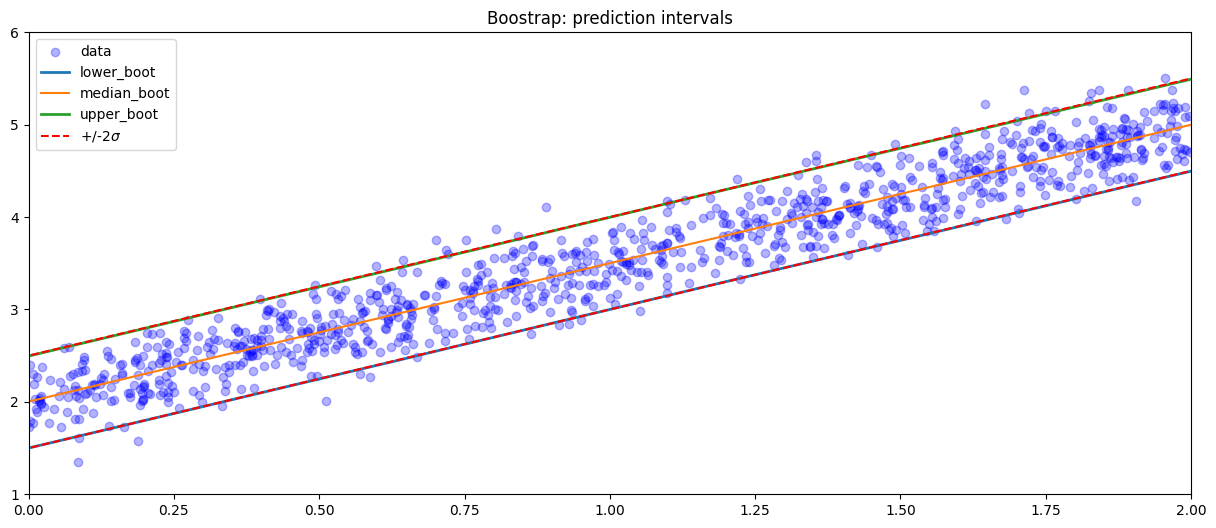

In [27]:
plt.figure(figsize=[15, 6])

a = linear_params.get('a',None)
b = linear_params.get('b',None)
_sigma = linear_params.get('sigma',None)

f_x = a* x_grid + b
_delta = 2.0*_sigma  # 2 sigmas

_ = plt.scatter(X_train, y_train, label='data', alpha=.3, color='blue')

_ = plt.plot(x_grid,_lower , label='lower_boot',linewidth=2)
_ = plt.plot(x_grid, _median, label='median_boot')
_ = plt.plot(x_grid, _upper, label='upper_boot', linewidth=2)

_ = plt.plot(x_grid, f_x + _delta, 'r--', label='+/-2$\sigma$'); # upper boundary prediction
_ = plt.plot(x_grid, f_x - _delta, 'r--'); # lower boundary prediction

_ = plt.title('Boostrap: prediction intervals')

_ = plt.xlim(0.0,2.0)
_ = plt.ylim(1.0,6.0)
_ = plt.legend();
_ = plt.show()

**~TODO~**:
 
* ~~test doubt package with linear true model but heterosdacity error distribution. I want to make sure it returns PI that adjust the size of the variance of the error at X0.~~  I believe assumes constant varaince based on the rsults bellow


### Non linear data equal variance

In [37]:
# create some data
n_samples = 100

X_train, y_train, yy_train = make_non_linear_data_homoscedasticity(n_samples)

x_grid = np.linspace(-2,2,100) # for evaluation plots

In [38]:
%%time
import lightgbm as lgb

model = MyBoot(lgb.LGBMRegressor())
model.fit(X_train.reshape(-1, 1), y_train)

CPU times: user 359 ms, sys: 688 ms, total: 1.05 s
Wall time: 134 ms


In [39]:
_median, _pi = model.predict(x_grid.reshape(-1, 1), uncertainty=0.05)
_lower, _upper = _pi[:,0], _pi[:,1]

In [40]:
model.quantile_vals

array([[-0.93189228,  0.86096924],
       [-0.93189228,  0.86096924],
       [-0.93189228,  0.86096924],
       [-0.93189228,  0.86096924],
       [-0.93189228,  0.86096924],
       [-0.93189228,  0.86096924],
       [-0.93189228,  0.86096924],
       [-0.93189228,  0.86096924],
       [-0.93189228,  0.86096924],
       [-0.93189228,  0.86096924],
       [-0.93189228,  0.86096924],
       [-0.93189228,  0.86096924],
       [-0.93189228,  0.86096924],
       [-0.93189228,  0.86096924],
       [-0.92263969,  0.86804412],
       [-0.92263969,  0.86804412],
       [-0.91347587,  0.83833705],
       [-0.91347587,  0.83833705],
       [-0.91347587,  0.83833705],
       [-0.91347587,  0.83833705],
       [-0.91347587,  0.83833705],
       [-0.91347587,  0.83833705],
       [-0.97661328,  0.89886787],
       [-1.02610477,  0.96781814],
       [-1.00260476,  0.92412932],
       [-1.00260476,  0.92412932],
       [-1.18773584,  1.1562405 ],
       [-1.15557926,  1.29093421],
       [-1.1449108 ,

Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations


Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations
Finished loading model, total used 100 iterations


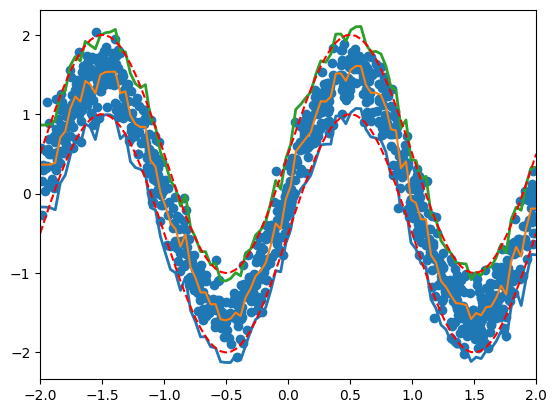

In [36]:
x_grid = np.linspace(-2,2,100) # for evaluation plots

f_x = 1.5*np.sin(np.pi*x_grid)
_sigma_x = 0.25

y_train.shape
yy_train.shape
 
# TODO: Add f(x) +/- 2 sigma  (NOT SIMPLE. NEEDS TO THINK A LITTLE)
#   f(x) = 1.5*np.sin(np.pi*X[:,0])
#   sigma => see scale in the code np.random.normal(loc=0.,scale=1.*np.power(X[:,0],2))
plt.scatter(X_train,y_train);

_ = plt.plot(x_grid,_lower , label='lower_boot',linewidth=2)
_ = plt.plot(x_grid, _median, label='median_boot')
_ = plt.plot(x_grid, _upper, label='upper_boot', linewidth=2)

plt.plot(x_grid, f_x + 2.0*_sigma_x, 'r--', label='+/-2$\sigma$'); # upper boundary prediction
plt.plot(x_grid, f_x - 2.0*_sigma_x, 'r--'); # lower boundary prediction

plt.xlim(-2,2);
plt.show();

### Linear Data unequal variance

In [ ]:
linear_params = {'a': 1.5, 'b': 2.0}
n_samples = 15000
X_train, y_train, yy_train = make_linear_data_heteroscedasticity(n_samples,linear_params)

In [ ]:
from scikit_bootstrap import WeightedBlockBootstrap

# testing doubt
# model = Boot(LinearRegression())
# model.fit(X_train.reshape(-1, 1), y_train)

# define the weights as the inverse of the variances
_sigma_x = 1.*np.power(x_grid,2)
weights = 1.0 / _sigma_x

# fit the model to all data and compute residuals
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)
y_pred = model.predict(X_train.reshape(-1, 1))
residuals = y_train - y_pred

# create a weighted block bootstrap object
bootstrap = WeightedBlockBootstrap(X.shape[0], weights=weights)

def bootstrap_func(X,y, residual, x_new):

    X_boot = X
    y_boot = y + residual
    
    return model.fit(X, y).predict(x_new)

# generate a large number of bootstrap estimates
bootstrap_estimates = bootstrap(
    (X_train.reshape(-1, 1), y_train, residuals),
    stat_func=lambda X, y, residuals: bootstrap_func(X,y, residual, xgrid),
    num_samples=1000,
    random_state=42
)


In [ ]:
_median, _pi = model.predict(x_grid.reshape(-1, 1), uncertainty=0.05)
_lower, _upper = _pi[:,0], _pi[:,1]

In [ ]:
plt.figure(figsize=[15, 6])

a = linear_params.get('a',None)
b = linear_params.get('b',None)

_sigma =  1.*np.power(x_grid,2)

f_x = a* x_grid + b
_delta = 2.0*_sigma  # 2 sigmas

_ = plt.scatter(X_train, y_train, label='data', alpha=.3, color='blue')

_ = plt.plot(x_grid,_lower , label='lower_boot',linewidth=2)
_ = plt.plot(x_grid, _median, label='median_boot')
_ = plt.plot(x_grid, _upper, label='upper_boot', linewidth=2)

_ = plt.plot(x_grid, f_x + _delta, 'r--', label='+/-2$\sigma$'); # upper boundary prediction
_ = plt.plot(x_grid, f_x - _delta, 'r--'); # lower boundary prediction

_ = plt.title('Boostrap: prediction intervals')

_ = plt.xlim(0.0,2.0)
#_ = plt.ylim(1.0,6.0)
_ = plt.legend();
_ = plt.show()

### Non-Linear Data unequal variance

In [ ]:
%%time
import lightgbm as lgb

model = Boot(lgb.LGBMRegressor())
model.fit(X_train.reshape(-1, 1), y_train)

pred_boot, _pi = model.predict(x_grid.reshape(-1, 1), uncertainty=0.05)
lower_boot_pred, upper_boot_pred = _pi[:,0], _pi[:,1]

### Ploting (Show me dont tell me)

In [ ]:
_ = plt.figure(figsize=[15, 6])

_ = plt.scatter(X_train, y_train, label='data', alpha=.2, color='blue')

# HQ PI 
_ = plt.plot(x_grid, upper_hq_pred, color='r',label='HQ upper') # upper boundary prediction
_ = plt.plot(x_grid, lower_hq_pred, color='r',label='HQ lower') # lower boundary prediction

# Quantile
_ = plt.plot(x_grid, upper_qr_pred, color='k',label='QR upper') # upper boundary prediction
_ = plt.plot(x_grid, lower_qr_pred, color='k',label='QR lower') # lower boundary prediction

# Bootstrap
_ = plt.plot(x_grid, upper_boot_pred, color='g',label='Boot upper') # upper boundary prediction
_ = plt.plot(x_grid, lower_boot_pred, color='g',label='Boot lower') # lower boundary prediction
_ = plt.plot(x_grid, pred_boot, color='g',label='Boot predictions') # lower boundary prediction


_ = plt.title('Comparing prediction intervals methods')
_ = plt.xlim(-2,2);
_ = plt.ylim(-2.5,2.5);
_ = plt.legend();
_ = plt.show()